In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Data=pd.read_csv('Cancer_Classification.csv')

In [3]:
Data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
x = Data.drop('benign_0__mal_1',axis=1).values
y = Data['benign_0__mal_1'].values

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=101)

In [7]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()

In [8]:
x_train=Scaler.fit_transform(x_train)
x_test=Scaler.transform(x_test)

In [9]:
x_train

array([[0.30280346, 0.28779168, 0.28292922, ..., 0.35910653, 0.13207175,
        0.09320478],
       [0.27589412, 0.25160636, 0.25735448, ..., 0.33852234, 0.33609304,
        0.11976912],
       [0.38255296, 0.26885357, 0.36398575, ..., 0.28549828, 0.40114331,
        0.11681753],
       ...,
       [0.44468907, 0.3361515 , 0.42142408, ..., 0.52233677, 0.21387739,
        0.05791683],
       [0.57678947, 0.39634765, 0.55279156, ..., 0.70378007, 0.41671595,
        0.2863702 ],
       [0.32922354, 0.30334799, 0.31402418, ..., 0.44123711, 0.25310467,
        0.23133937]])

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [12]:
Model = Sequential()
Model.add(Dense(units=30,activation='relu',kernel_initializer='he_uniform'))
Model.add(Dense(units=15,activation='relu',kernel_initializer='he_uniform'))

Model.add(Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))

Model.compile(loss='binary_crossentropy', optimizer='adam')

In [13]:
Model.fit(x=x_train,y=y_train,epochs=600,validation_data=(x_test, y_test), verbose=1)

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 4ms/sample - loss: 0.6829 - val_loss: 0.6492
Epoch 2/600
426/426 [==============================] - 0s 289us/sample - loss: 0.6269 - val_loss: 0.6050
Epoch 3/600
426/426 [==============================] - 0s 307us/sample - loss: 0.5811 - val_loss: 0.5618
Epoch 4/600
426/426 [==============================] - 0s 308us/sample - loss: 0.5370 - val_loss: 0.5164
Epoch 5/600
426/426 [==============================] - 0s 211us/sample - loss: 0.4936 - val_loss: 0.4716
Epoch 6/600
426/426 [==============================] - 0s 184us/sample - loss: 0.4486 - val_loss: 0.4275
Epoch 7/600
426/426 [==============================] - 0s 288us/sample - loss: 0.4076 - val_loss: 0.3864
Epoch 8/600
426/426 [==============================] - 0s 160us/sample - loss: 0.3672 - val_loss: 0.3466
Epoch 9/600
426/426 [==============================] - 0s 154us/sample - loss: 0.3317 - val_loss: 0.3098
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 187us/sample - loss: 0.0574 - val_loss: 0.1196
Epoch 79/600
426/426 [==============================] - 0s 185us/sample - loss: 0.0591 - val_loss: 0.1196
Epoch 80/600
426/426 [==============================] - 0s 173us/sample - loss: 0.0564 - val_loss: 0.1271
Epoch 81/600
426/426 [==============================] - 0s 170us/sample - loss: 0.0577 - val_loss: 0.1221
Epoch 82/600
426/426 [==============================] - 0s 173us/sample - loss: 0.0569 - val_loss: 0.1190
Epoch 83/600
426/426 [==============================] - 0s 159us/sample - loss: 0.0560 - val_loss: 0.1216
Epoch 84/600
426/426 [==============================] - 0s 159us/sample - loss: 0.0555 - val_loss: 0.1274
Epoch 85/600
426/426 [==============================] - 0s 156us/sample - loss: 0.0574 - val_loss: 0.1240
Epoch 86/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0554 - val_loss: 0.1190
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0452 - val_loss: 0.1296
Epoch 156/600
426/426 [==============================] - 0s 174us/sample - loss: 0.0442 - val_loss: 0.1358
Epoch 157/600
426/426 [==============================] - 0s 267us/sample - loss: 0.0447 - val_loss: 0.1358
Epoch 158/600
426/426 [==============================] - 0s 234us/sample - loss: 0.0469 - val_loss: 0.1337
Epoch 159/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0449 - val_loss: 0.1332
Epoch 160/600
426/426 [==============================] - 0s 265us/sample - loss: 0.0431 - val_loss: 0.1357
Epoch 161/600
426/426 [==============================] - 0s 293us/sample - loss: 0.0446 - val_loss: 0.1340
Epoch 162/600
426/426 [==============================] - 0s 306us/sample - loss: 0.0446 - val_loss: 0.1361
Epoch 163/600
426/426 [==============================] - 0s 306us/sample - loss: 0.0456 - val_loss: 0.1339
Epoch 164/600
426/426 [==============

426/426 [==============================] - 0s 152us/sample - loss: 0.0296 - val_loss: 0.1397
Epoch 308/600
426/426 [==============================] - 0s 159us/sample - loss: 0.0282 - val_loss: 0.1457
Epoch 309/600
426/426 [==============================] - 0s 269us/sample - loss: 0.0283 - val_loss: 0.1425
Epoch 310/600
426/426 [==============================] - 0s 291us/sample - loss: 0.0285 - val_loss: 0.1417
Epoch 311/600
426/426 [==============================] - 0s 252us/sample - loss: 0.0287 - val_loss: 0.1535
Epoch 312/600
426/426 [==============================] - 0s 287us/sample - loss: 0.0289 - val_loss: 0.1449
Epoch 313/600
426/426 [==============================] - 0s 267us/sample - loss: 0.0288 - val_loss: 0.1461
Epoch 314/600
426/426 [==============================] - 0s 251us/sample - loss: 0.0285 - val_loss: 0.1488
Epoch 315/600
426/426 [==============================] - 0s 265us/sample - loss: 0.0303 - val_loss: 0.1356
Epoch 316/600
426/426 [============================

426/426 [==============================] - 0s 234us/sample - loss: 0.0188 - val_loss: 0.1721
Epoch 460/600
426/426 [==============================] - 0s 237us/sample - loss: 0.0196 - val_loss: 0.1737
Epoch 461/600
426/426 [==============================] - 0s 222us/sample - loss: 0.0178 - val_loss: 0.1762
Epoch 462/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0185 - val_loss: 0.1737
Epoch 463/600
426/426 [==============================] - 0s 177us/sample - loss: 0.0226 - val_loss: 0.1665
Epoch 464/600
426/426 [==============================] - 0s 173us/sample - loss: 0.0206 - val_loss: 0.1841
Epoch 465/600
426/426 [==============================] - 0s 166us/sample - loss: 0.0181 - val_loss: 0.1713
Epoch 466/600
426/426 [==============================] - 0s 186us/sample - loss: 0.0184 - val_loss: 0.1799
Epoch 467/600
426/426 [==============================] - 0s 198us/sample - loss: 0.0178 - val_loss: 0.1719
Epoch 468/600
426/426 [============================

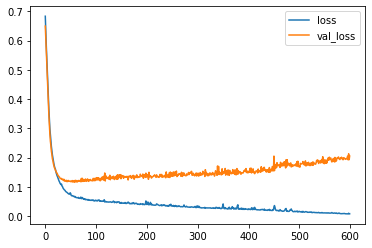

In [14]:
Model_Loss=pd.DataFrame(Model.history.history)
Model_Loss.plot()

In [15]:
Model_Loss

,loss,val_loss
0,0.682883,0.649232
1,0.626934,0.604978
2,0.581133,0.561827
3,0.537046,0.516445
4,0.493616,0.471596
...,...,...
595,0.008054,0.205249
596,0.008467,0.192454
597,0.010262,0.213193
598,0.007881,0.193084


In [17]:
Model1 = Sequential()
Model1.add(Dense(units=30,activation='relu',kernel_initializer='he_uniform'))
Model1.add(Dense(units=15,activation='relu',kernel_initializer='he_uniform'))

Model1.add(Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))

Model1.compile(loss='binary_crossentropy', optimizer='adam')

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [21]:
Early_Stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [22]:
Model1.fit(x=x_train,y=y_train,epochs=600,validation_data=(x_test, y_test), verbose=1,callbacks=[Early_Stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6697 - val_loss: 0.6454
Epoch 2/600
426/426 [==============================] - 0s 160us/sample - loss: 0.6313 - val_loss: 0.6106
Epoch 3/600
426/426 [==============================] - 0s 159us/sample - loss: 0.5933 - val_loss: 0.5738
Epoch 4/600
426/426 [==============================] - 0s 186us/sample - loss: 0.5527 - val_loss: 0.5310
Epoch 5/600
426/426 [==============================] - 0s 163us/sample - loss: 0.5101 - val_loss: 0.4872
Epoch 6/600
426/426 [==============================] - 0s 166us/sample - loss: 0.4642 - val_loss: 0.4407
Epoch 7/600
426/426 [==============================] - 0s 152us/sample - loss: 0.4171 - val_loss: 0.3891
Epoch 8/600
426/426 [==============================] - 0s 158us/sample - loss: 0.3704 - val_loss: 0.3448
Epoch 9/600
426/426 [==============================] - 0s 164us/sample - loss: 0.3316 - val_loss: 0.3079
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 274us/sample - loss: 0.0555 - val_loss: 0.1060
Epoch 79/600
426/426 [==============================] - 0s 256us/sample - loss: 0.0548 - val_loss: 0.1032
Epoch 80/600
426/426 [==============================] - 0s 209us/sample - loss: 0.0521 - val_loss: 0.0970
Epoch 81/600
426/426 [==============================] - 0s 284us/sample - loss: 0.0520 - val_loss: 0.0978
Epoch 82/600
426/426 [==============================] - 0s 265us/sample - loss: 0.0523 - val_loss: 0.0962
Epoch 83/600
426/426 [==============================] - 0s 371us/sample - loss: 0.0514 - val_loss: 0.1008
Epoch 84/600
426/426 [==============================] - 0s 166us/sample - loss: 0.0511 - val_loss: 0.0933
Epoch 85/600
426/426 [==============================] - 0s 173us/sample - loss: 0.0549 - val_loss: 0.1003
Epoch 86/600
426/426 [==============================] - 0s 195us/sample - loss: 0.0511 - val_loss: 0.0947
Epoch 87/600
426/426 [========================

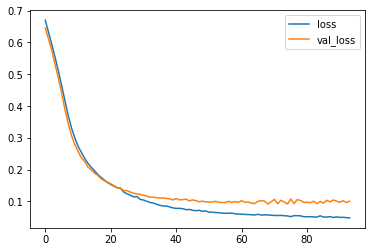

In [34]:
Model1_Loss=pd.DataFrame(Model1.history.history)
Model1_Loss.plot()

In [ ]:
# Drop Out:

In [33]:
from tensorflow.keras.layers import Dropout

In [35]:
Model2 = Sequential()
Model2.add(Dense(units=30,activation='relu',kernel_initializer='he_uniform'))
Model2.add(Dropout(0.5))

Model2.add(Dense(units=15,activation='relu',kernel_initializer='he_uniform'))
Model2.add(Dropout(0.5))


Model2.add(Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))

Model2.compile(loss='binary_crossentropy', optimizer='adam')

In [36]:
Model2.fit(x=x_train,y=y_train,epochs=600,validation_data=(x_test, y_test), verbose=1,callbacks=[Early_Stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6910 - val_loss: 0.6398
Epoch 2/600
426/426 [==============================] - 0s 75us/sample - loss: 0.6855 - val_loss: 0.6187
Epoch 3/600
426/426 [==============================] - 0s 75us/sample - loss: 0.6799 - val_loss: 0.6009
Epoch 4/600
426/426 [==============================] - 0s 77us/sample - loss: 0.6496 - val_loss: 0.5727
Epoch 5/600
426/426 [==============================] - 0s 77us/sample - loss: 0.6316 - val_loss: 0.5487
Epoch 6/600
426/426 [==============================] - 0s 80us/sample - loss: 0.6119 - val_loss: 0.5309
Epoch 7/600
426/426 [==============================] - 0s 79us/sample - loss: 0.5701 - val_loss: 0.5077
Epoch 8/600
426/426 [==============================] - 0s 77us/sample - loss: 0.5669 - val_loss: 0.4807
Epoch 9/600
426/426 [==============================] - 0s 82us/sample - loss: 0.5429 - val_loss: 0.4577
Epoch 10/600
426/42

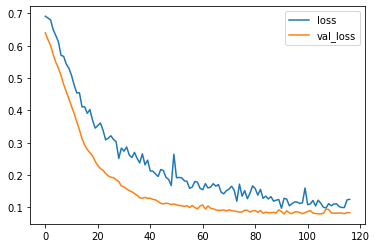

In [37]:
Model2_Loss=pd.DataFrame(Model2.history.history)
Model2_Loss.plot()

In [39]:
y_pred=Model2.predict(x_test)
y_pred

array([[9.88915563e-01],
       [9.88156438e-01],
       [9.90978122e-01],
       [1.52862072e-02],
       [9.99065340e-01],
       [9.98941898e-01],
       [9.98575687e-01],
       [1.01327896e-06],
       [9.94238257e-01],
       [9.96621370e-01],
       [2.00471282e-03],
       [9.93607044e-01],
       [9.47030783e-01],
       [9.97967124e-01],
       [1.45062804e-03],
       [9.98094440e-01],
       [9.87957776e-01],
       [9.98777986e-01],
       [7.83801079e-06],
       [9.72299576e-02],
       [9.63543415e-01],
       [9.96601343e-01],
       [9.77234721e-01],
       [9.98123050e-01],
       [1.00669265e-03],
       [9.66683745e-01],
       [8.35329294e-04],
       [9.99843061e-01],
       [5.89638948e-04],
       [1.04387999e-02],
       [3.24205130e-01],
       [5.01894951e-03],
       [7.32450187e-01],
       [2.19606549e-01],
       [9.98451889e-01],
       [9.99059260e-01],
       [1.42661035e-02],
       [4.34393883e-02],
       [1.43617392e-04],
       [3.93390656e-06],


In [41]:
Pred_y=(y_pred>0.5)
Pred_y

array([[ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [

In [44]:
Pred_y.shape

(143, 1)

In [48]:
Pred_Y=Pred_y.reshape(143,)

In [52]:
Y_Prediction=pd.get_dummies(Pred_Y,drop_first=True)
Y_Prediction

,True
0,1
1,1
2,1
3,0
4,1
...,...
138,0
139,1
140,0
141,1


In [53]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [58]:
print(confusion_matrix(y_test,Y_Prediction))
print(classification_report(y_test,Y_Prediction))
print(accuracy_score(y_test,Y_Prediction))

[[54  1]
 [ 2 86]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

0.9790209790209791


In [60]:
print(confusion_matrix(y_test,Pred_y))
print(classification_report(y_test,Pred_y))
print(accuracy_score(y_test,Pred_y))

[[54  1]
 [ 2 86]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

0.9790209790209791
